# Capstone project two (Exploratory Data Analysis)

## 1. Importing the necessary libraries and loading the dataframe

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os
from scipy import stats
# plt.style.use('ggplot')

In [2]:
# Load the dataset
df_EDA = pd.read_csv('..\Dataset\df_EDA.csv', index_col=0)
df = df_EDA.head()

In [3]:
# Make 'Dependent_Count' column as dtypes 'int64'
df_EDA['Dependent_Count'] = df_EDA['Dependent_Count'].astype('int64')

## 2. Numeric EDA

In [4]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10120 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10120 non-null  object 
 1   Age                       10120 non-null  int64  
 2   Gender                    10120 non-null  object 
 3   Dependent_Count           10120 non-null  int64  
 4   Education                 10120 non-null  object 
 5   Marital_Status            10120 non-null  object 
 6   Income                    10120 non-null  object 
 7   Card_Category             10120 non-null  object 
 8   Months_On_Book            10120 non-null  int64  
 9   Total_Relationship_Count  10120 non-null  int64  
 10  Months_Inactive           10120 non-null  int64  
 11  Contacts_Count            10120 non-null  int64  
 12  Credit_Limit              10120 non-null  float64
 13  Total_Revolving_Bal       10120 non-null  int64  
 14  Avg_Op

In [5]:
df_EDA.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10120.0,46.325099,8.017044,26.0,41.000,46.0000,52.00000,73.000
Dependent_Count,10120.0,2.345850,1.298418,0.0,1.000,2.0000,3.00000,5.000
Months_On_Book,10120.0,35.927569,7.986994,13.0,31.000,36.0000,40.00000,56.000
Total_Relationship_Count,10120.0,3.812945,1.554330,1.0,3.000,4.0000,5.00000,6.000
Months_Inactive,10120.0,2.341502,1.010752,0.0,2.000,2.0000,3.00000,6.000
Contacts_Count,10120.0,2.455632,1.105381,0.0,2.000,2.0000,3.00000,6.000
Credit_Limit,10120.0,8629.456235,9086.657280,1438.3,2554.500,4549.0000,11063.25000,34516.000
Total_Revolving_Bal,10120.0,1162.238142,814.895945,0.0,355.500,1276.0000,1783.00000,2517.000
Avg_Open_To_Buy,10120.0,7467.218093,9088.819145,3.0,1323.500,3474.5000,9855.50000,34516.000
Total_Amt_Chng_Q4_Q1,10120.0,0.759766,0.217667,0.0,0.631,0.7365,0.85900,3.397


In [6]:
# Percent customer attrition
df_EDA.Attrition_Flag.value_counts(normalize=True)

Existing Customer    0.839427
Attrited Customer    0.160573
Name: Attrition_Flag, dtype: float64

## 3. Observing the distribution of numeric columns

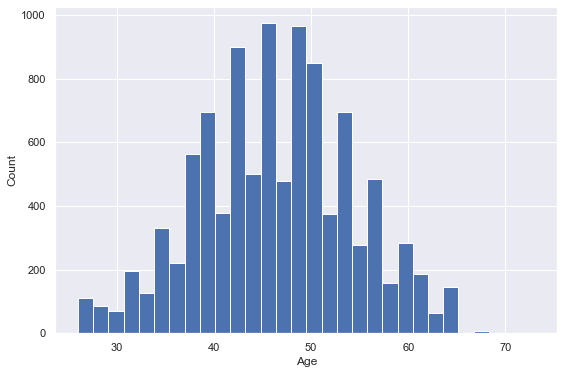

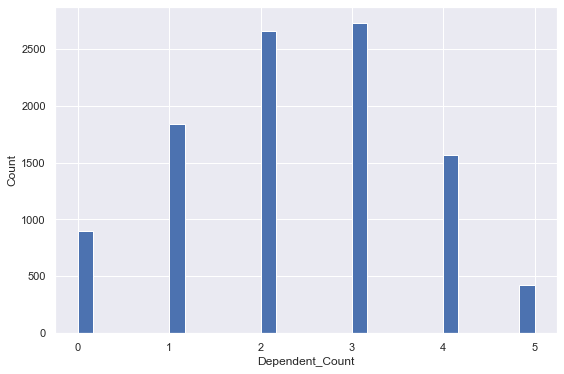

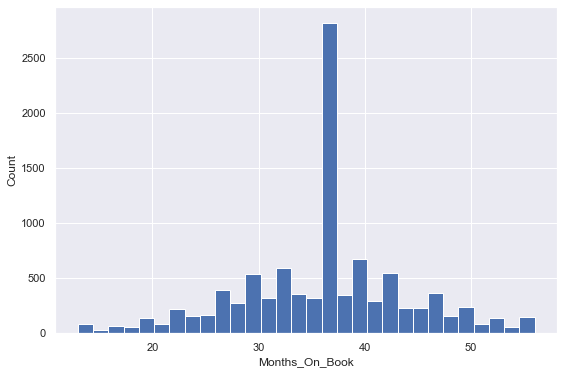

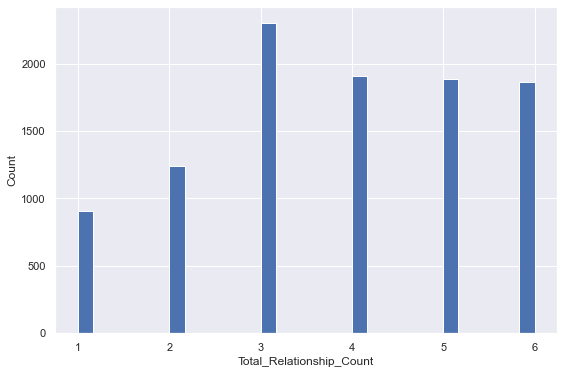

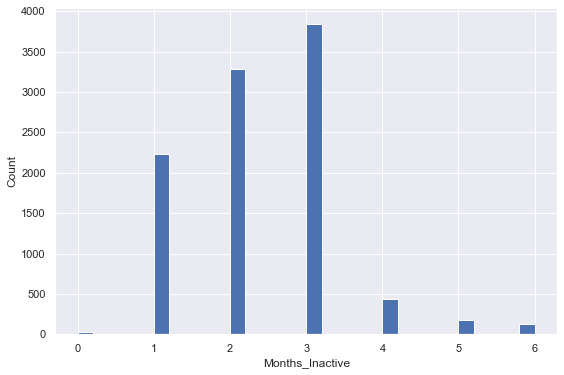

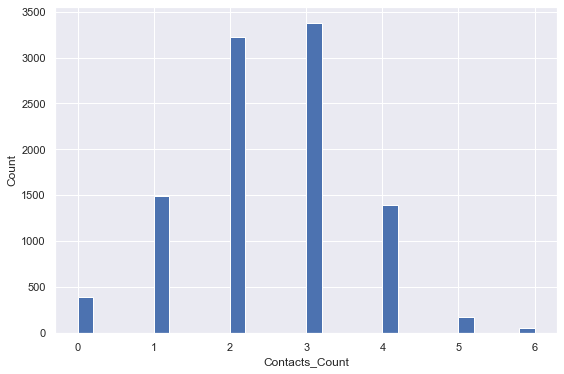

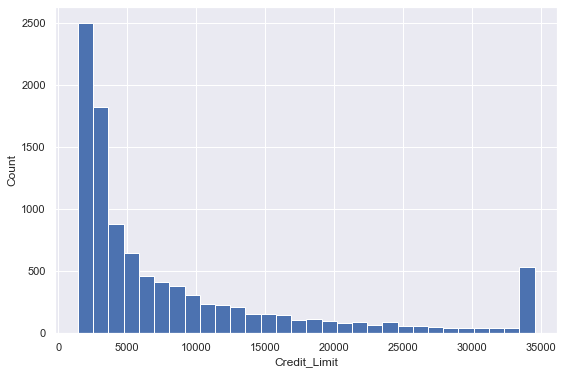

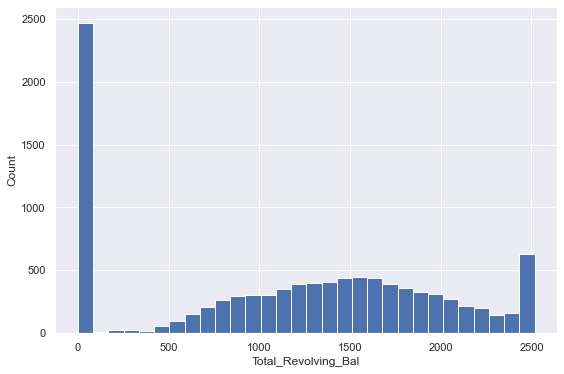

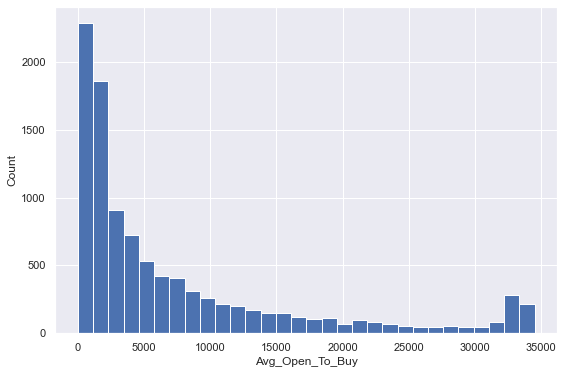

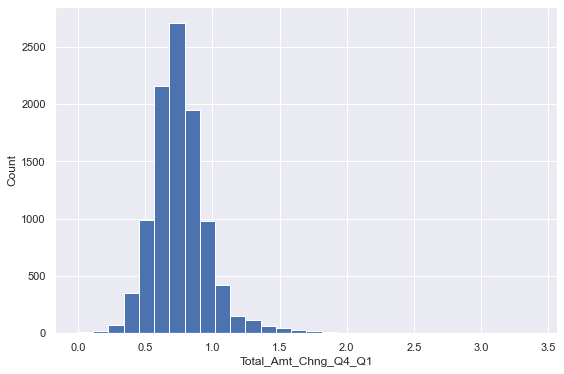

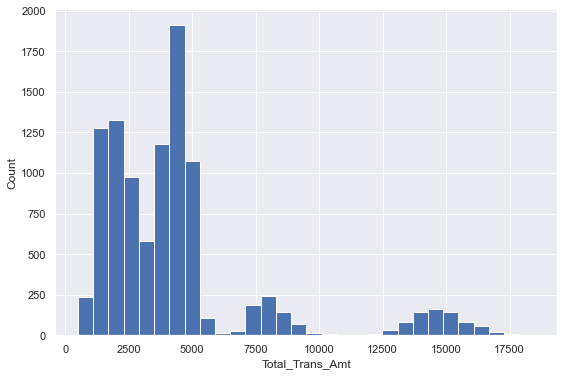

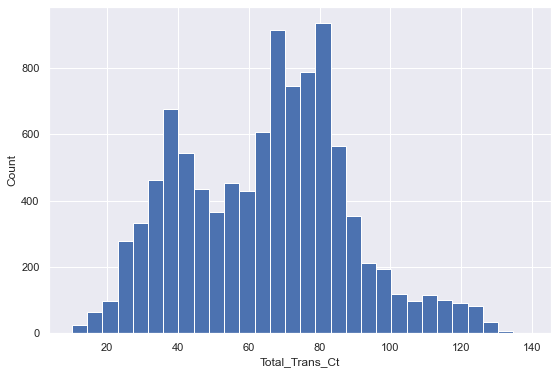

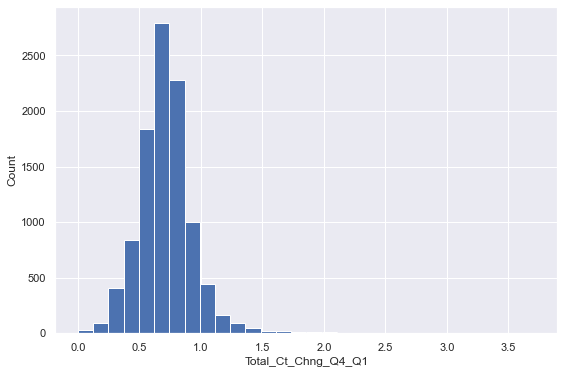

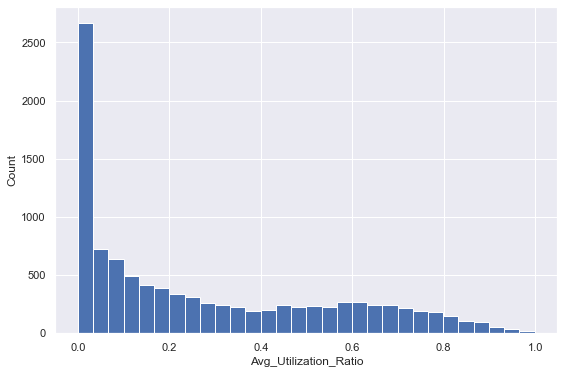

In [7]:
# Inspecting the distribution of data by using histogram
def plot_histogram(df, col_list):
    for col in col_list:
        fig, ax = plt.subplots(figsize=(9,6))
        ax.hist(df[col], bins=30)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        fig.savefig(f"..\Figures\Histogram_of_{col}_Column.png", dpi=300)
        plt.show()
plot_histogram(df_EDA, df_EDA.select_dtypes('number').columns)

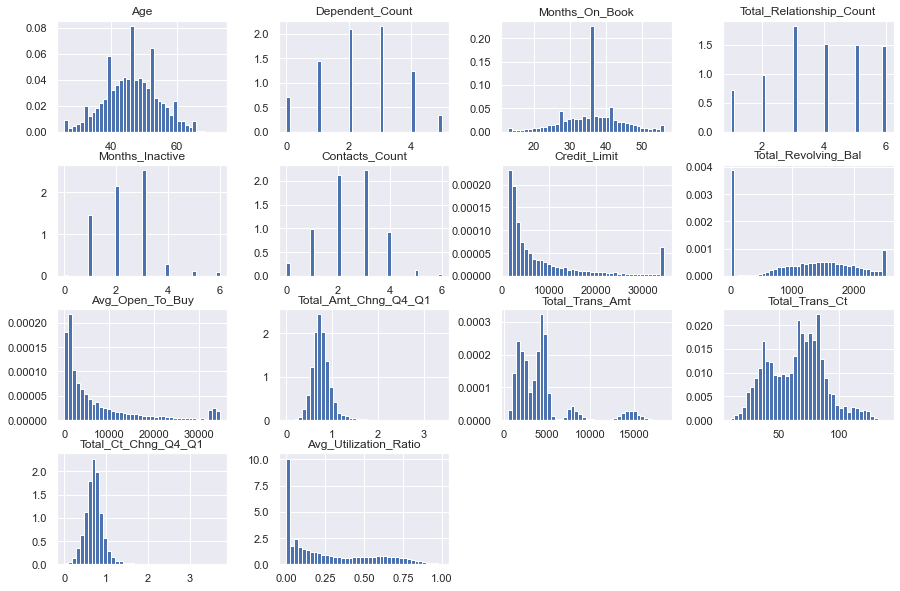

In [8]:
df_EDA.hist(bins=40, figsize=(15,10), density=True)
plt.savefig(f'..\Figures\Histogram.png', dpi=300)

By observing histogram its clearly visible that some numerical columns contain the normal distribution and rest are either skewed or uniform distribution.

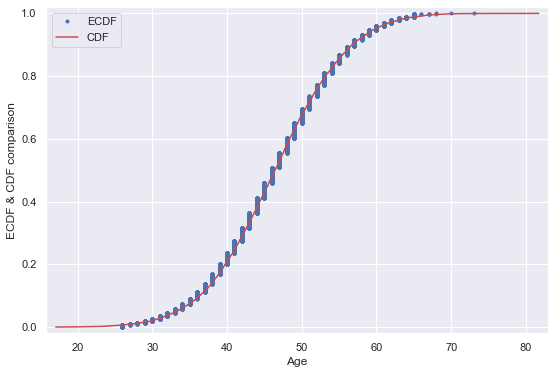

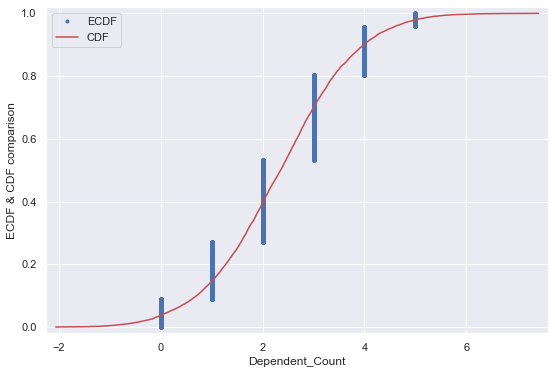

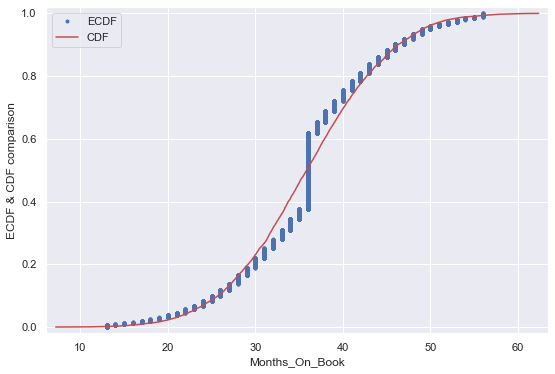

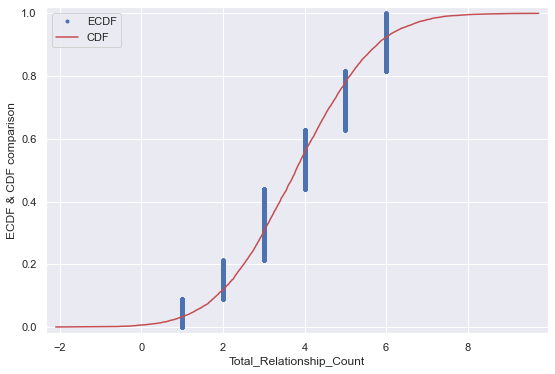

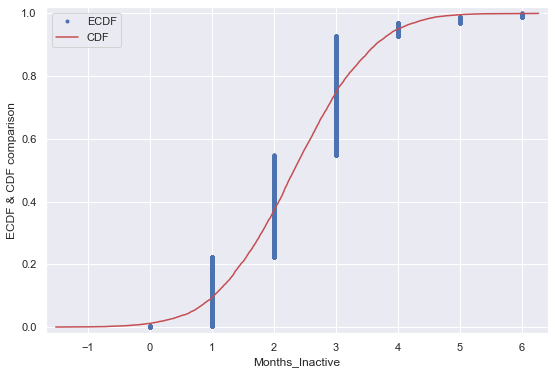

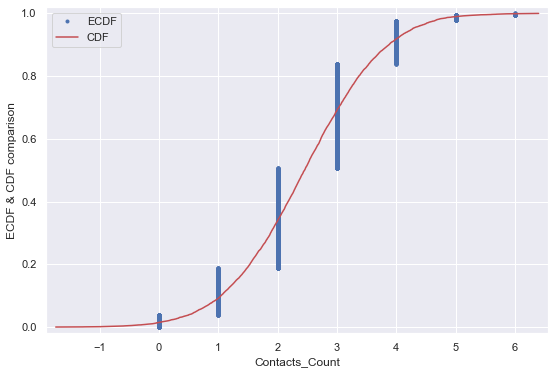

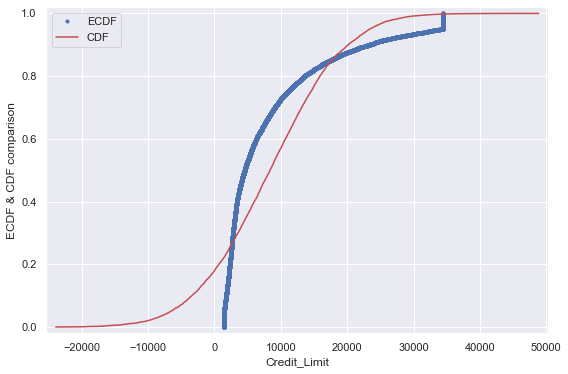

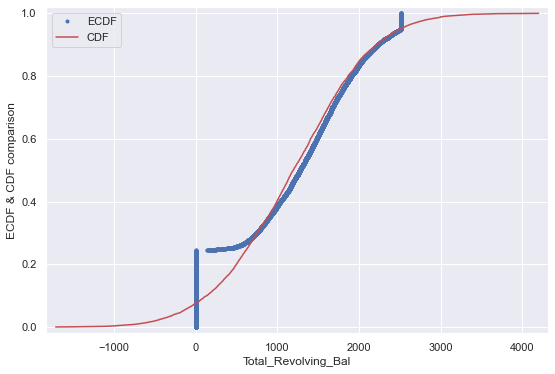

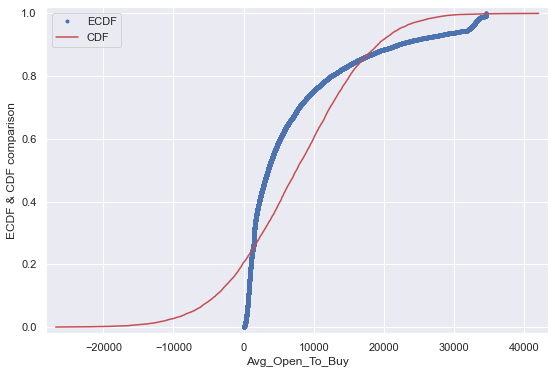

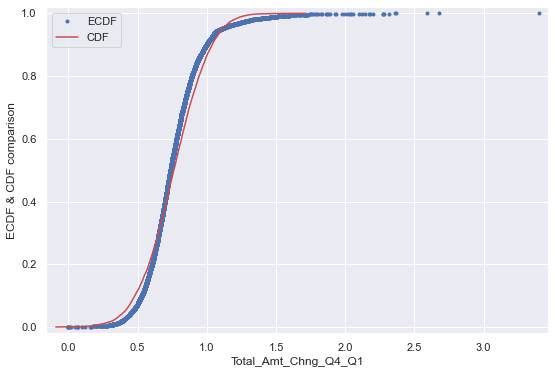

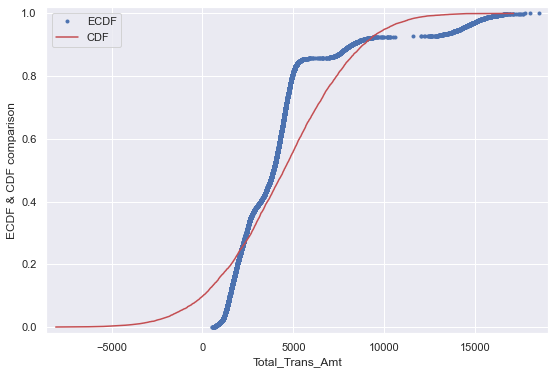

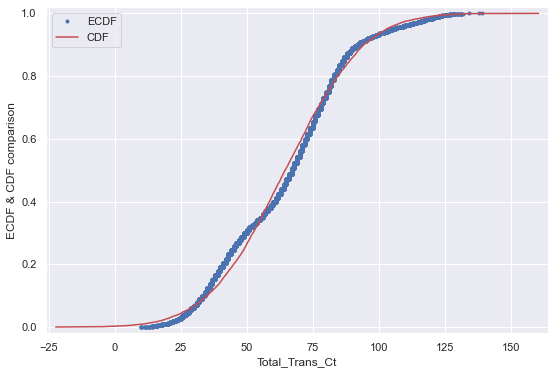

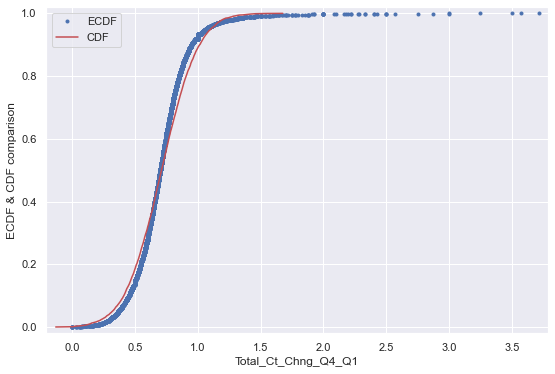

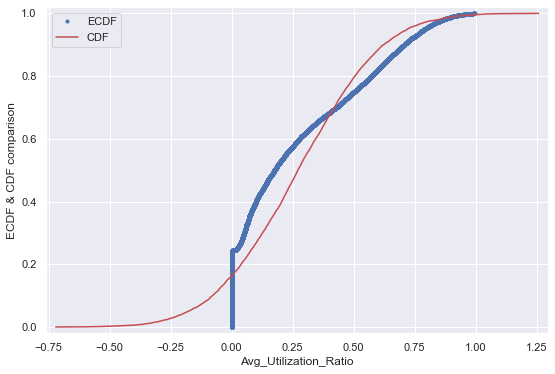

None


In [9]:
# Visualizing ECDF plots and theoritical CDF plot to check normality of different columns distribution
def ecdf_cdf_comparison(df, col_list):
    """
    ecdf & plots to see the distribution of column values
    """
    for col in col_list:
        fig, ax = plt.subplots(figsize=(9,6))
        # Computing and plotting ECDF
        x = np.sort(df[col])
        y = np.arange(1, len(x)+1)/len(x)
        ax.plot(x,y, marker='.', linestyle='none', color='b', label='ECDF')
        ax.set_xlabel(col)
        ax.set_ylabel('ECDF & CDF comparison')
        # Computing and plotting theoritical CDF
        mean = df[col].mean()
        std = df[col].std()
        sample = np.random.normal(mean, std, size=9307)
        x_theor = np.sort(sample)
        y_theor = np.arange(1, len(x_theor)+1)/len(x_theor)
        ax.plot(x_theor,y_theor, color='r', label='CDF')
        ax.margins(0.02)
        ax.legend()
        fig.savefig(f"..\Figures\ECDF_of_{col}_Column.png", dpi=300)
        plt.show()
result = ecdf_cdf_comparison(df_EDA, df_EDA.select_dtypes('number').columns)
print(result)

By comparing the theoretical cdf with empirical cdf we have seen that the numerical columns 'Age', 'Dependent_Count', 'Total_Relationship_Count', 'Months_Inactive', 'Contacts_Count' in the dataframe are normally distributed and the rest are not normally distributed.

## 4. Visualizing, detecting, and removing outliers

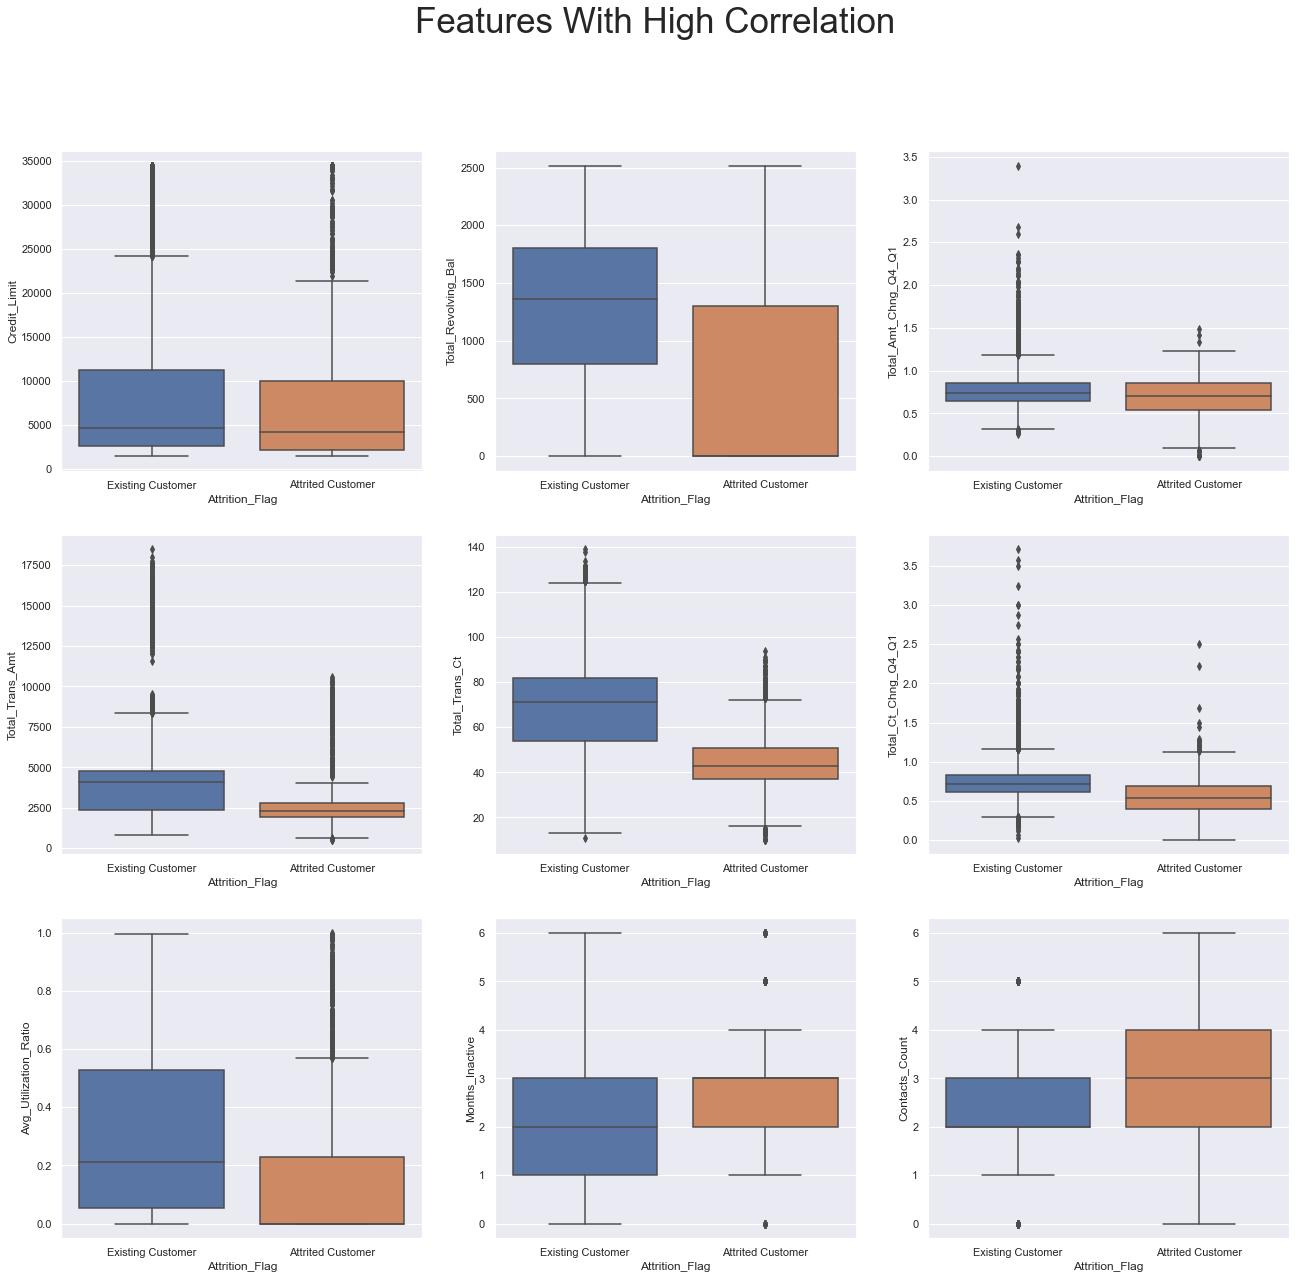

In [10]:
#visualizing the features whigh positive and negative correlation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(22,20))
fig.suptitle('Features With High Correlation', size=35)
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=df_EDA, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=df_EDA, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=df_EDA, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df_EDA, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=df_EDA, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=df_EDA, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=df_EDA, ax=axes[2,0])
sns.boxplot(x="Attrition_Flag", y="Months_Inactive", data=df_EDA, ax=axes[2,1])
sns.boxplot(x="Attrition_Flag", y="Contacts_Count", data=df_EDA, ax=axes[2,2])
fig.savefig('..\Figures\Boxplot.png', dpi = 300)

The above figure shows that some numerical columns including 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', and 'Total_Trans_Ct' contains significant outliers.

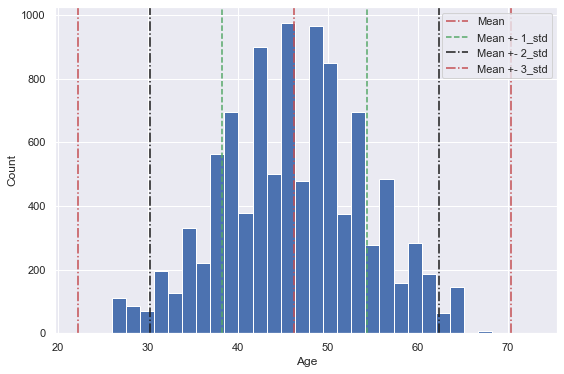

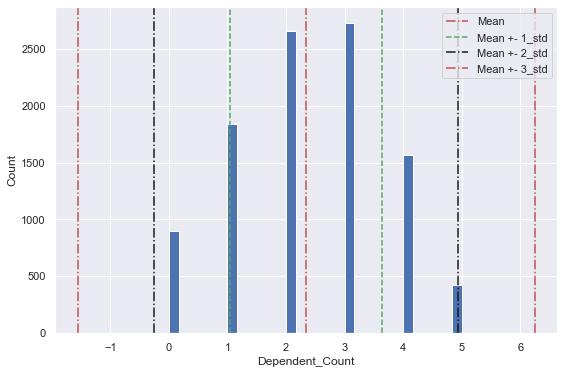

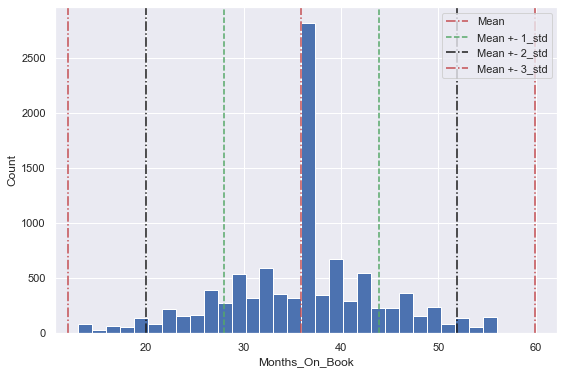

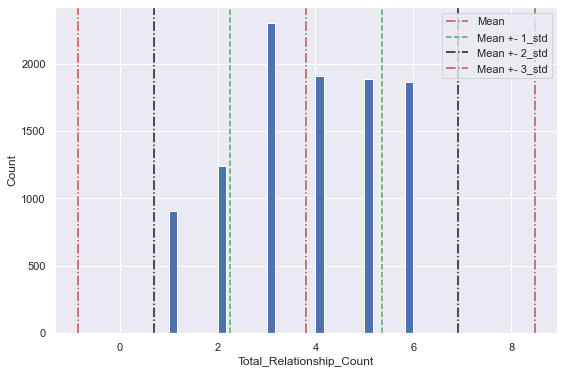

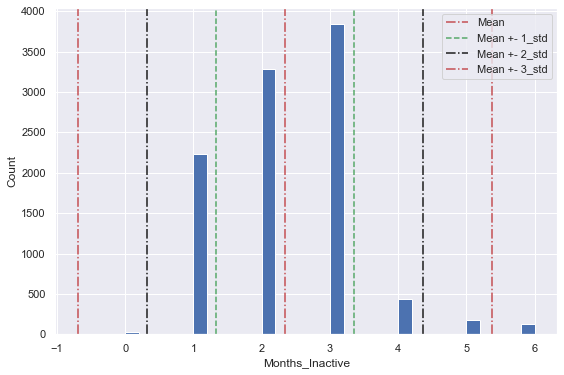

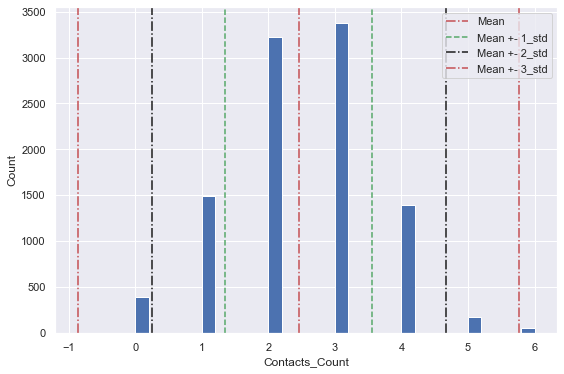

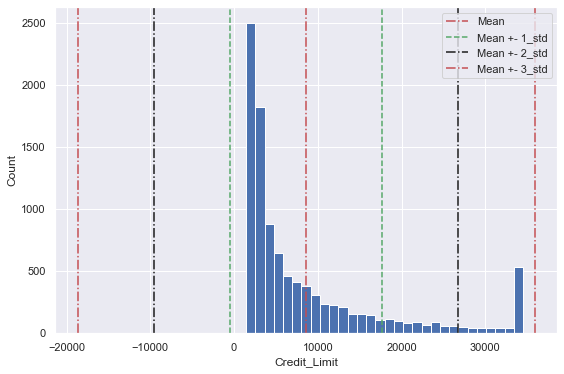

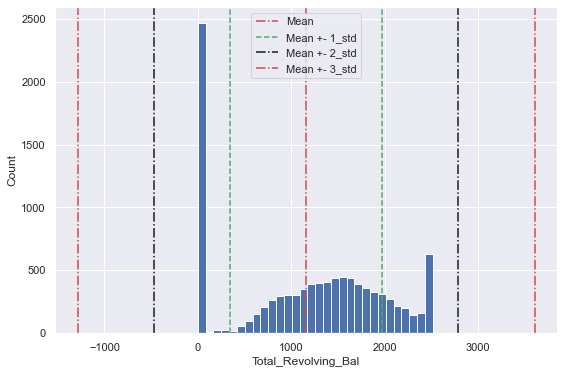

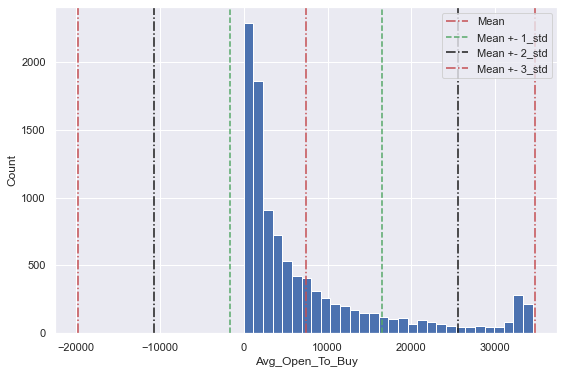

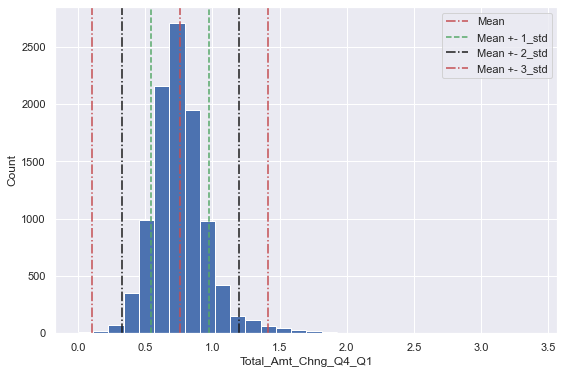

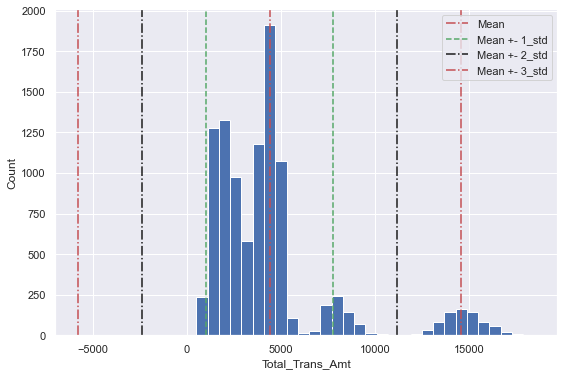

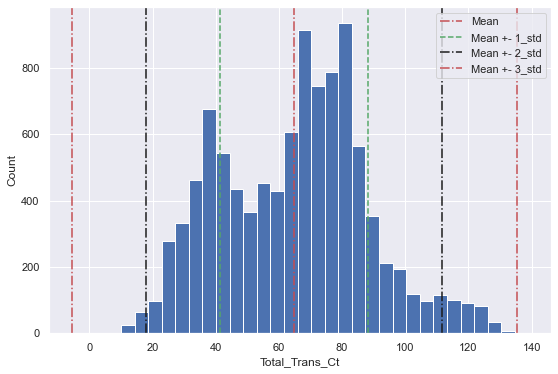

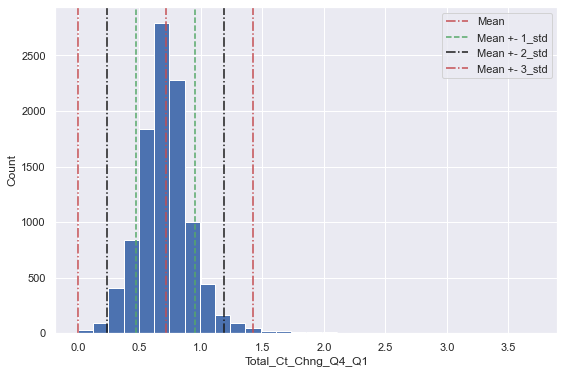

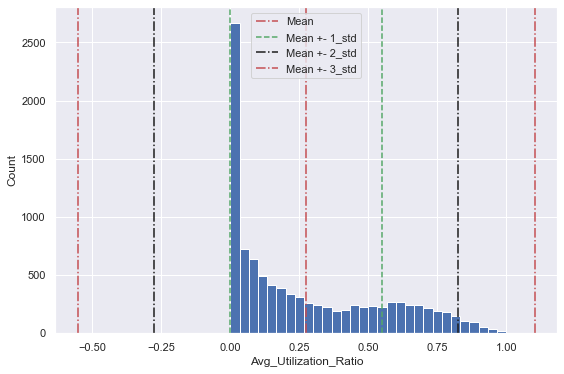

None


In [11]:
# detecting outliers using histograms and standard deviation based visualization
def visualizing_outliers(df, col_list):
    """
    Visualizing outliers by using histograms
    """
    for col in col_list:
        fig, ax =plt.subplots(figsize=(9,6))
        ax.hist(df[col], bins=30)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.axvline(df[col].mean(), color='r', label='Mean', linestyle='-.')
        ax.axvline(df[col].mean() + df[col].std(), color='g', linestyle='--', label='Mean +- 1_std')
        ax.axvline(df[col].mean() - df[col].std(), color='g', linestyle='--')
        ax.axvline(df[col].mean() + 2*df[col].std(), color='k', linestyle='-.', label='Mean +- 2_std')
        ax.axvline(df[col].mean() - 2*df[col].std(), color='k', linestyle='-.')
        ax.axvline(df[col].mean() + 3*df[col].std(), color='r', linestyle='-.', label='Mean +- 3_std')
        ax.axvline(df[col].mean() - 3*df[col].std(), color='r', linestyle='-.')
        ax.legend()
        fig.savefig(f"..\Figures\Visualizing_Outlier_of_{col}_Column.png", dpi=300)
        plt.show()
result = visualizing_outliers(df_EDA, df_EDA.select_dtypes('number').columns)
print(result)

The above figure shows the standard deviation based outlier detection. The output of the histogram and the vertical lines (standard  deviation based detection) can detect the outliered columns. The visualization clearly shows that the numerical columns 'Months_Inactive', 'Contact_Count', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1' contains significant outliers (the values outside the limits of mean plus minus three standard deviation).

In [12]:
# The null values before removing outliers
df_EDA.isna().sum()

Attrition_Flag              0
Age                         0
Gender                      0
Dependent_Count             0
Education                   0
Marital_Status              0
Income                      0
Card_Category               0
Months_On_Book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts_Count              0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
# Detecting and removing outliers (standard daviation based detection)
def outlier_detection(df, col_list):
    """
    Detecting outliers of individual columns based on standard daviation based detection
    Removing outliers 
    """
    for col in col_list:
        if ((col == 'Months_Inactive') or (col == 'Contacts_Count')):
            print(f'{col} column is discrete')
        else:
            min_value = df[col].min()
            max_value = df[col].max()
            mean_value = df[col].mean()
            std_value = df[col].std()
            cut_off = 3 * std_value
            lower_bound = mean_value - cut_off
            upper_bound = mean_value + cut_off
            if ((min_value < lower_bound) or (max_value > upper_bound)):
                print(f"Outlier detected and removed from '{col}' column")
            df[col] = df.loc[(df[col]>lower_bound) & (df[col]<upper_bound), col]
# Calling outlier_detection function for all numeric columns
outlier_detection(df_EDA, df_EDA.select_dtypes('number').columns)

Outlier detected and removed from 'Age' column
Months_Inactive column is discrete
Contacts_Count column is discrete
Outlier detected and removed from 'Total_Amt_Chng_Q4_Q1' column
Outlier detected and removed from 'Total_Trans_Amt' column
Outlier detected and removed from 'Total_Trans_Ct' column
Outlier detected and removed from 'Total_Ct_Chng_Q4_Q1' column


In [14]:
# Observing the null values after removing outliers
df_EDA.isna().sum()

Attrition_Flag                0
Age                           1
Gender                        0
Dependent_Count               0
Education                     0
Marital_Status                0
Income                        0
Card_Category                 0
Months_On_Book                0
Total_Relationship_Count      0
Months_Inactive               0
Contacts_Count                0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1        163
Total_Trans_Amt             392
Total_Trans_Ct                2
Total_Ct_Chng_Q4_Q1         113
Avg_Utilization_Ratio         0
dtype: int64

In [15]:
# Dropping null values
df_EDA = df_EDA.dropna()

In [16]:
# Shape of the dataframe after removing null values
df_EDA.shape

(9478, 20)

## 5. Visualizing the correlation between columns

In [17]:
df_EDA.corr()

,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Age,1.000000,-0.128047,0.787999,-0.021082,0.051845,-0.018539,0.005198,0.013431,0.003970,-0.082164,-0.029813,-0.053441,-0.031784,0.004091
Dependent_Count,-0.128047,1.000000,-0.111075,-0.044043,-0.007594,-0.042386,0.066633,-0.001625,0.066719,-0.029798,0.043511,0.062078,0.016931,-0.035067
Months_On_Book,0.787999,-0.111075,1.000000,-0.017983,0.072471,-0.010806,0.006995,0.005898,0.006451,-0.058671,-0.019548,-0.038428,-0.023854,-0.009564
Total_Relationship_Count,-0.021082,-0.044043,-0.017983,1.000000,-0.005729,0.049020,-0.057725,0.023222,-0.059786,0.048135,-0.340687,-0.203754,0.042824,0.060985
Months_Inactive,0.051845,-0.007594,0.072471,-0.005729,1.000000,0.031054,-0.021353,-0.043223,-0.017396,-0.020692,-0.036487,-0.044168,-0.040863,-0.009036
Contacts_Count,-0.018539,-0.042386,-0.010806,0.049020,0.031054,1.000000,0.027654,-0.055038,0.032642,-0.024448,-0.136791,-0.168070,-0.104467,-0.061256
Credit_Limit,0.005198,0.066633,0.006995,-0.057725,-0.021353,0.027654,1.000000,0.035428,0.995849,0.014376,0.135033,0.034217,-0.015204,-0.476482
Total_Revolving_Bal,0.013431,-0.001625,0.005898,0.023222,-0.043223,-0.055038,0.035428,1.000000,-0.055687,0.037699,0.044154,0.048121,0.086165,0.635655
Avg_Open_To_Buy,0.003970,0.066719,0.006451,-0.059786,-0.017396,0.032642,0.995849,-0.055687,1.000000,0.010929,0.130886,0.029802,-0.023038,-0.533938
Total_Amt_Chng_Q4_Q1,-0.082164,-0.029798,-0.058671,0.048135,-0.020692,-0.024448,0.014376,0.037699,0.010929,1.000000,0.110659,0.099118,0.306742,0.026433


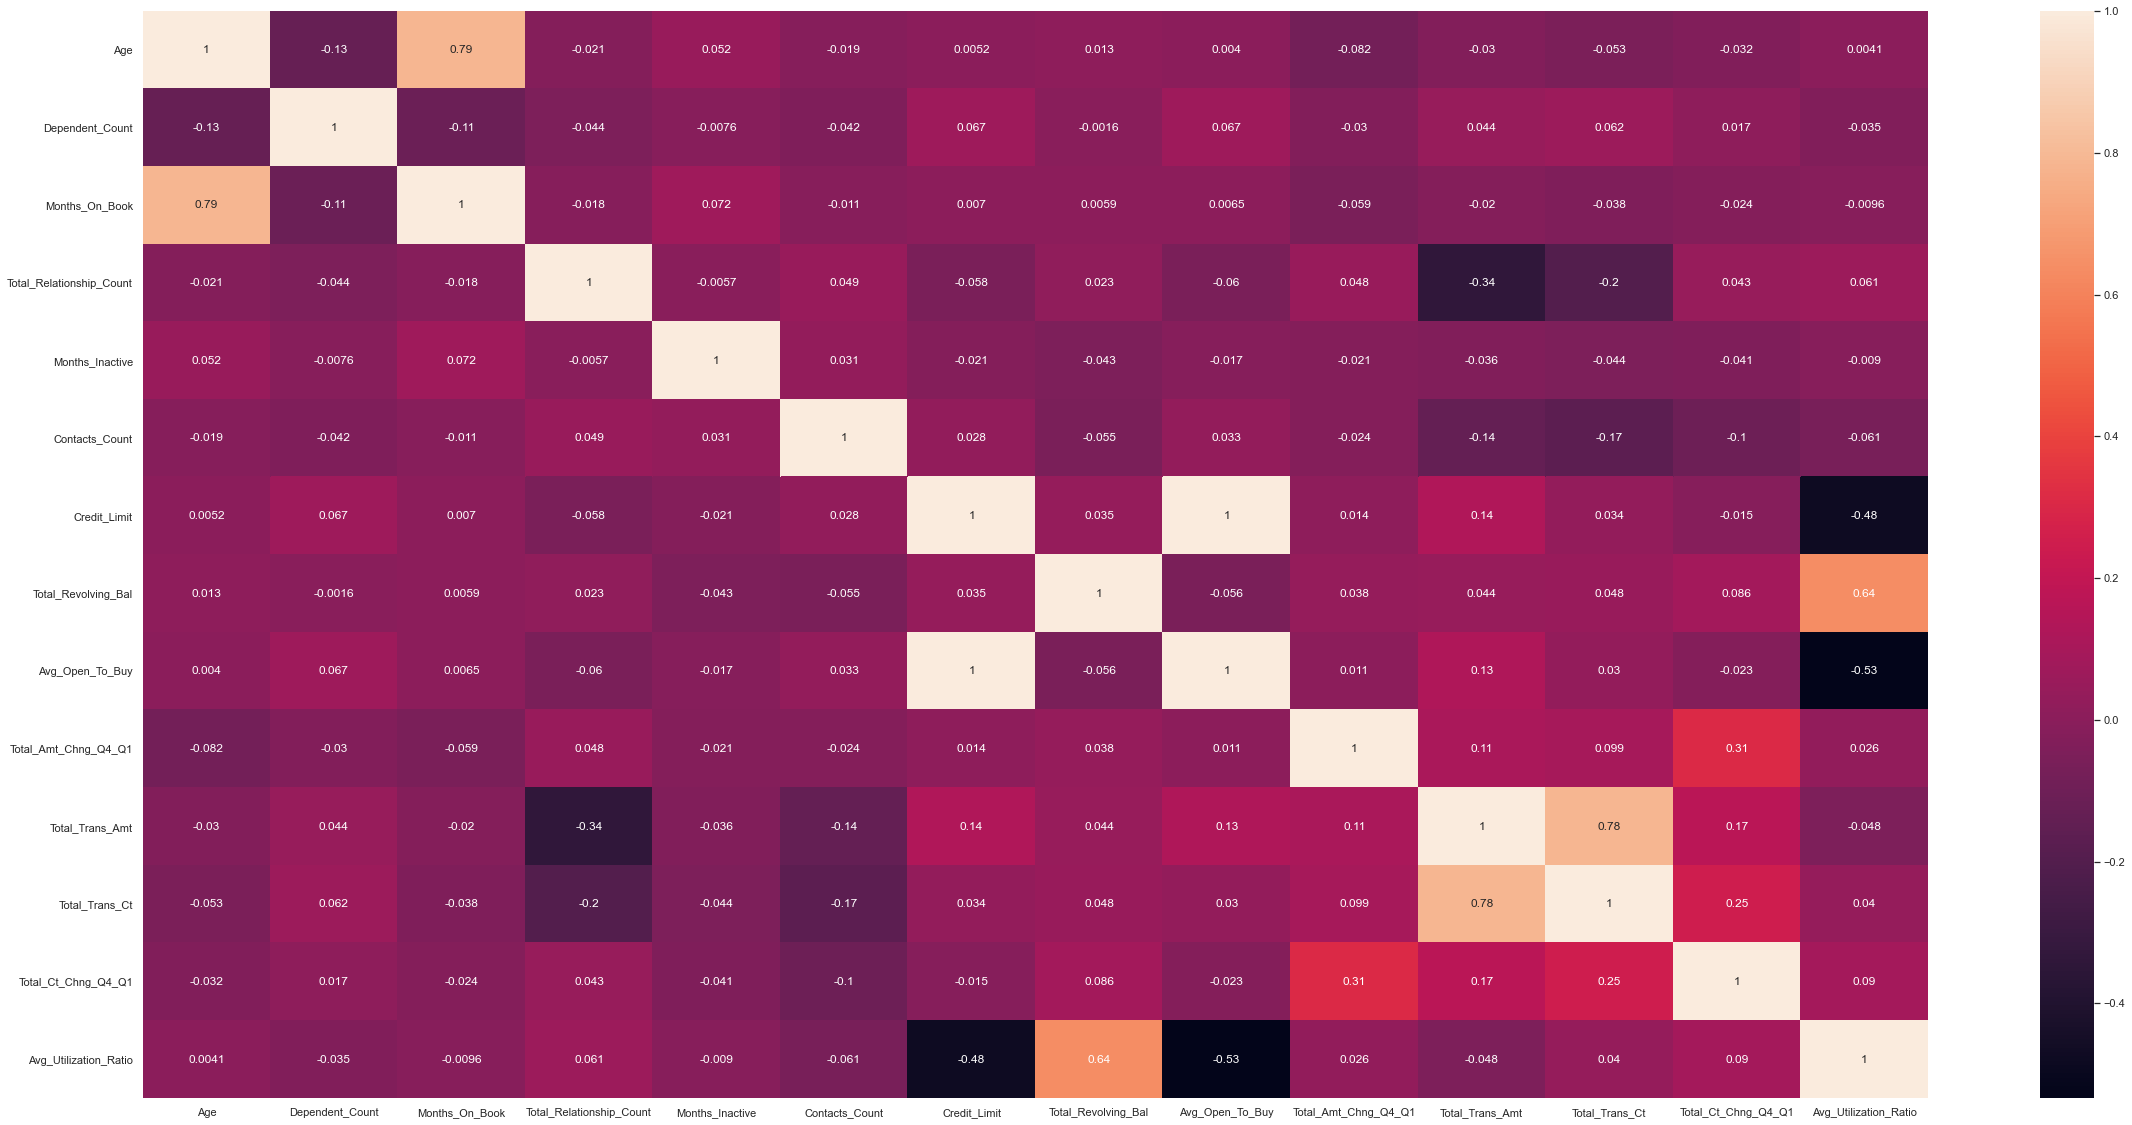

In [18]:
fig, ax = plt.subplots(figsize=(40,20))
# plt.figure(figsize=(40,20))
sns.heatmap(df_EDA.corr(), annot=True)
fig.savefig('..\Figures\Heatmap.png', dpi=300)

There is significant positive correlation between 'Credit_Limit' and 'Avg_Open_To_Buy' columns. Also there is a positive correlation between 'Credit_Limit' and 'Avg_open_to_buy' columns, between 'Age' and 'Months_On_Book' columns, between 'Total_Revolving_Bal' and 'Avg_Utilization_Ratio' columns, and between 'Total_Trans_Amt' and 'Total_Trans_Ct' columns.

There is a negative correlation between 'Credit_Limit' and 'Avg_Utilization_Ratio' columns, between 'Avg_Open_To_Buy' and 'Credit_Limit' columns, between 'Total_Relationship_Count' and 'Total_Trans_Amt' columns.

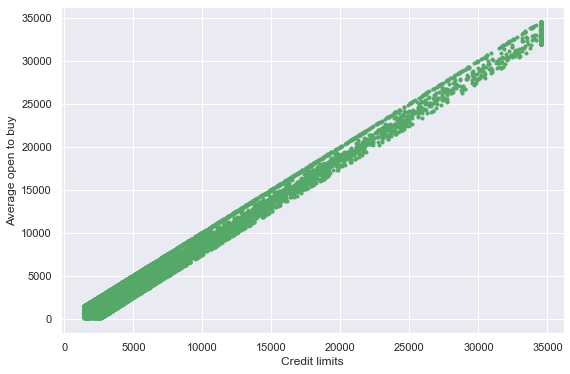

In [19]:
# Visualizing the most significant correlation between 'Credit_Limit' and 'Avg_Open_To_Buy' columns by using scatterplot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(df_EDA['Credit_Limit'], df_EDA['Avg_Open_To_Buy'], marker='.', linestyle='None', color='g')
ax.set_xlabel('Credit limits')
ax.set_ylabel('Average open to buy')
fig.savefig('..\Figures\High_Correlated_Columns.png')

In [20]:
# function to calculate the pearson correlation coefficient between two highly correlated attributes
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two columns."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]
r = pearson_r(df_EDA['Credit_Limit'], df_EDA['Avg_Open_To_Buy'])
print(r)

0.9958486677063734


In [21]:
# pearson correlation coefficient
from scipy.stats.stats import pearsonr
print(pearsonr(df_EDA['Credit_Limit'], df_EDA['Avg_Open_To_Buy'])[0])

0.9958486677063735


In [22]:
# Removing most correlated 'Avg_Open_To_Buy' column
# df_EDA = df_EDA.drop('Avg_Open_To_Buy', axis=1)

## 6. Visualizing the distribution of categorical columns

In [23]:
df_EDA.select_dtypes('object').columns

Index(['Attrition_Flag', 'Gender', 'Education', 'Marital_Status', 'Income',
       'Card_Category'],
      dtype='object')

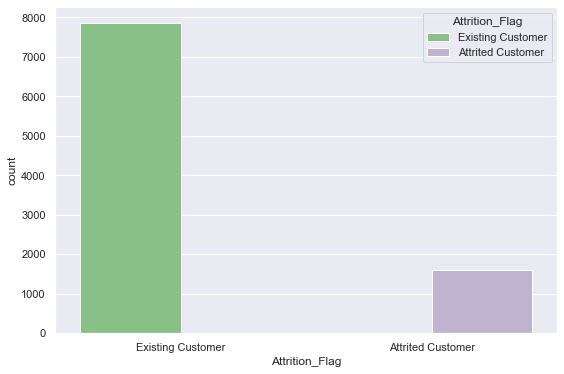

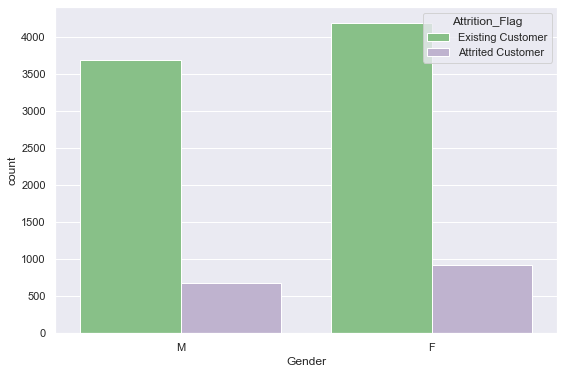

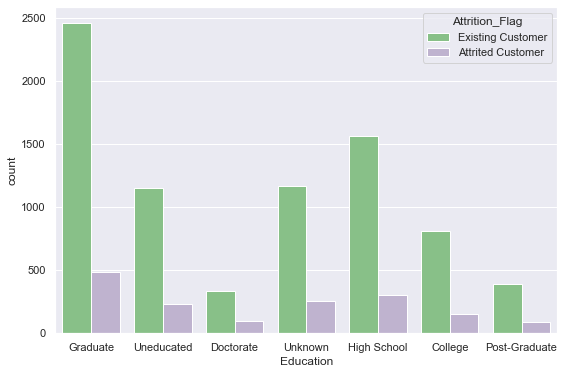

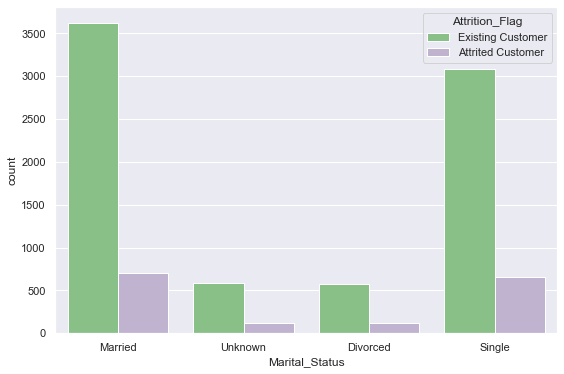

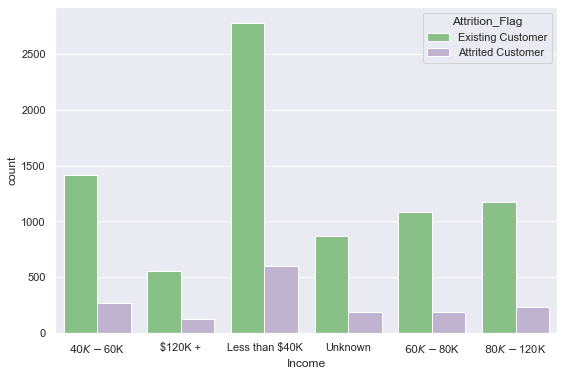

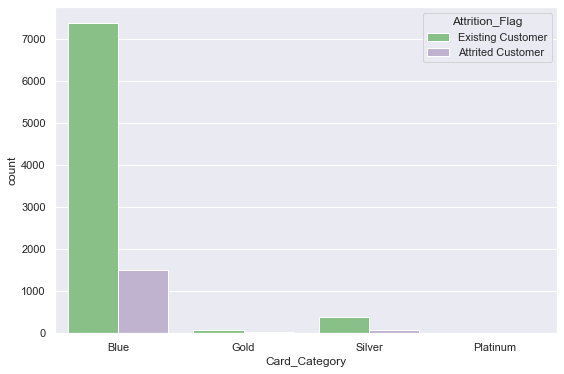

None


In [24]:
def count_plot(df, col_list):
    """
    visualizing the distribution of categorical columns
    """
    for col in col_list:
        plt.figure(figsize=(9,6))
        sns.countplot(x= col, data = df, hue='Attrition_Flag', palette='Accent')
        plt.savefig(f'..\Figures\Count_Plot_of_{col}_Column')
        plt.show()
result = count_plot(df_EDA, df_EDA.select_dtypes('object').columns)
print(result)

The above count plot visualizes the distribution of categorical columns. The 'Card_Category' column contain class imbalane data.

In [25]:
df_EDA['Card_Category'].value_counts()

Blue        8886
Silver       477
Gold          98
Platinum      17
Name: Card_Category, dtype: int64

## 7. Saving the final dataframe

In [26]:
# Save the final dataframe to drive for preprocessing
df_EDA.to_csv('..\Dataset\df_preprocessing.csv')